In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [3]:
from apyori import apriori

In [4]:
dataset = pd.read_csv('C://Users//nehaa//Downloads//Market_Basket_Optimisation.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [5]:
dataset.isnull().sum()/len(dataset)*100

0      0.000000
1     23.383549
2     41.487802
3     55.405946
4     66.284495
5     75.149980
6     81.749100
7     86.921744
8     91.281163
9     94.734035
10    96.587122
11    97.946940
12    98.840155
13    99.373417
14    99.666711
15    99.893348
16    99.946674
17    99.946674
18    99.960005
19    99.986668
dtype: float64

In [6]:
dataset.fillna(0,inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       7501 non-null   object
 2   2       7501 non-null   object
 3   3       7501 non-null   object
 4   4       7501 non-null   object
 5   5       7501 non-null   object
 6   6       7501 non-null   object
 7   7       7501 non-null   object
 8   8       7501 non-null   object
 9   9       7501 non-null   object
 10  10      7501 non-null   object
 11  11      7501 non-null   object
 12  12      7501 non-null   object
 13  13      7501 non-null   object
 14  14      7501 non-null   object
 15  15      7501 non-null   object
 16  16      7501 non-null   object
 17  17      7501 non-null   object
 18  18      7501 non-null   object
 19  19      7501 non-null   object
dtypes: object(20)
memory usage: 1.1+ MB


In [8]:
dataset.shape

(7501, 20)

In [9]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501,7501
unique,115,118,116,115,111,107,103,99,89,81,67,51,44,29,20,9,4,4,4,2
top,mineral water,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,577,1754,3112,4156,4972,5637,6132,6520,6847,7106,7245,7347,7414,7454,7476,7493,7497,7497,7498,7500


In [10]:
# For using apriori we have to convert data into list format 
#transactions = []
#for i in range(0,7501):
    #for j in range(0,20):
        #if str(dataset.values[i,j]) != '0':
            #transactions.append(str(dataset.values[i,j]))

#transaction = np.array(transaction)
transaction = []

for i in range(0,7501):
    transaction.append([str(dataset.values[i, j]) for j in range(0,20)])
    
transaction = np.array(transaction)

In [11]:
print(transaction.shape)
print("**************************")
print(transaction[0:20])

(7501, 20)
**************************
[['shrimp' 'almonds' 'avocado' 'vegetables mix' 'green grapes'
  'whole weat flour' 'yams' 'cottage cheese' 'energy drink'
  'tomato juice' 'low fat yogurt' 'green tea' 'honey' 'salad'
  'mineral water' 'salmon' 'antioxydant juice' 'frozen smoothie'
  'spinach' 'olive oil']
 ['burgers' 'meatballs' 'eggs' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0']
 ['chutney' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0']
 ['turkey' 'avocado' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['low fat yogurt' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0']
 ['whole wheat pasta' 'french fries' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0']
 ['soup' 'light cream' 'shallot' '0' '0' '0' '0' '0' '0'

# EDA


In [12]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [13]:
from wordcloud import WordCloud

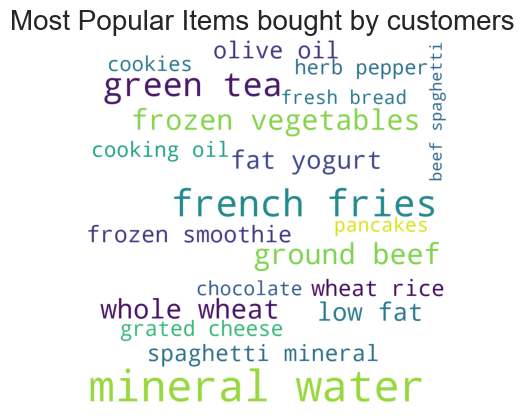

In [14]:
#unique_string=(" ").join(transaction)

#now since transaction is an array of list of lists we need to flatten the structure
flattened_data = [word for sublist in transaction for word in sublist]
unique_string=(" ").join(flattened_data)

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white', max_words=20).generate(unique_string)

plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Popular Items bought by customers", fontsize=20)
plt.show()
 

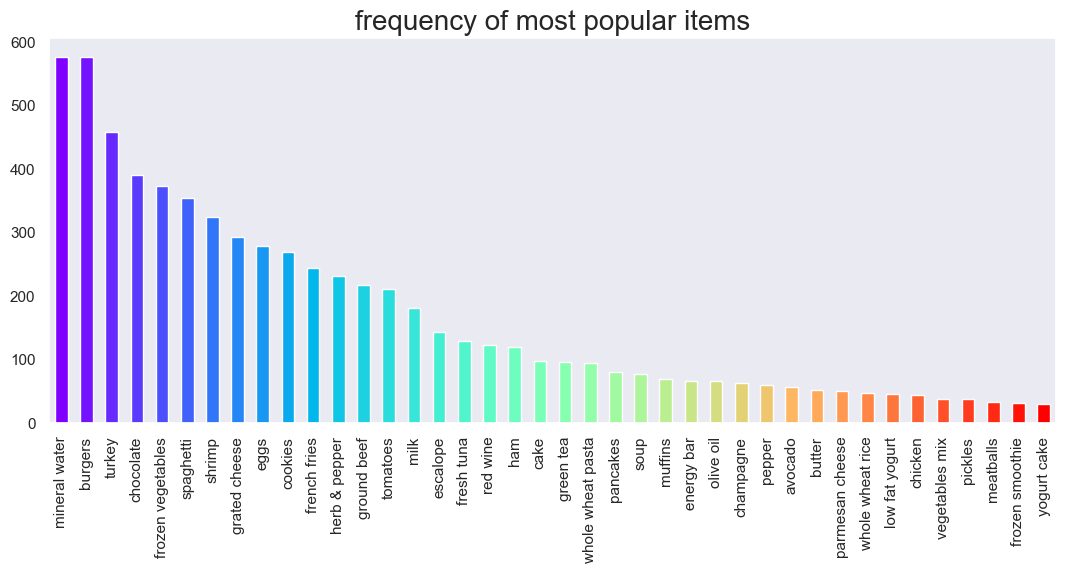

In [15]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
dataset[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# Association Rule Mining

In [16]:
transaction = list(transaction)
transaction

[array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
        'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
        'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
        'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
        'spinach', 'olive oil'], dtype='<U20'),
 array(['burgers', 'meatballs', 'eggs', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype='<U20'),
 array(['chutney', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0'], dtype='<U20'),
 array(['turkey', 'avocado', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype='<U20'),
 array(['mineral water', 'milk', 'energy bar', 'whole wheat rice',
        'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0'], dtype='<U20'),
 array(['low fat yogurt', '0', '0', '0', '0

In [17]:
rules = apriori(transaction, min_support=0.01, min_confidence=0.2, min_lift = 2, min_length=2)
rules

<generator object apriori at 0x000001E49C7CD310>

In [18]:
Results = list(rules)
Results

[RelationRecord(items=frozenset({'frozen vegetables', 'shrimp'}), support=0.01666444474070124, ordered_statistics=[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]),
 RelationRecord(items=frozenset({'frozen vegetables', 'tomatoes'}), support=0.0161311825089988, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomatoes'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23586744639376217, lift=2.4744639376218323)]),
 RelationRecord(items=frozenset({'ground beef', 'grated cheese'}), support=0.011331822423676844, ordered_statistics=[OrderedStatistic(items_base=frozenset({'grated cheese'}), items_add=frozenset({'ground beef'}), confidence=0.2162849872773537, lift=2.201294015695292)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=fro

In [19]:
df_results = pd.DataFrame(Results)
df_results.head()

,items,support,ordered_statistics
0,"(frozen vegetables, shrimp)",0.016664,"[((shrimp), (frozen vegetables), 0.23320895522..."
1,"(frozen vegetables, tomatoes)",0.016131,"[((tomatoes), (frozen vegetables), 0.235867446..."
2,"(ground beef, grated cheese)",0.011332,"[((grated cheese), (ground beef), 0.2162849872..."
3,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
4,"(ground beef, olive oil)",0.014131,"[((olive oil), (ground beef), 0.21457489878542..."


In [20]:
#keep support in a separate data frame so we can use later.. 
support = df_results.support

In [21]:
df_results.ordered_statistics[0]

[OrderedStatistic(items_base=frozenset({'shrimp'}), items_add=frozenset({'frozen vegetables'}), confidence=0.23320895522388058, lift=2.44657394843962)]

In [32]:
#converting ordered_statistic in proper format 
items_base_list = []
items_add_list = []
confidence_list = []
lift_list = []
#iterating through every row of df_results and appending to lists
for i in range(df_results.shape[0]): #retrieves the number of rows in the DataFrame 
    single_list = df_results['ordered_statistics'][i][0] # extracting first ordered statistics object from the 'ordered_statistics' column for the current row and stores it in the single_list variable
    items_base_list.append(list(single_list[0]))
    items_add_list.append(list(single_list[1]))
    confidence_list.append(single_list[2])
    lift_list.append(single_list[3])
    

In [23]:
# converting all 4 lists into dataframe 
items_base = pd.DataFrame(items_base_list)
items_add = pd.DataFrame(items_add_list)
confidence = pd.DataFrame(confidence_list, columns=['Confidence'])
lift = pd.DataFrame(lift_list, columns = ['Lift'])

In [24]:
# concat all list together in a single dataframe
df_final = pd.concat([items_base,items_add,support,confidence,lift], axis=1)
df_final

,0,1,0,1,support,Confidence,Lift
0,shrimp,None,frozen vegetables,None,0.016664,0.233209,2.446574
1,tomatoes,None,frozen vegetables,None,0.016131,0.235867,2.474464
2,grated cheese,None,ground beef,None,0.011332,0.216285,2.201294
3,herb & pepper,None,ground beef,None,0.015998,0.323450,3.291994
4,olive oil,None,ground beef,None,0.014131,0.214575,2.183889
5,ground beef,None,spaghetti,None,0.039195,0.398915,2.291162
6,soup,None,milk,None,0.015198,0.300792,2.321232
7,red wine,None,spaghetti,None,0.010265,0.364929,2.095966
8,shrimp,None,frozen vegetables,0,0.016664,0.233209,2.446574
9,tomatoes,None,frozen vegetables,0,0.016131,0.235867,2.474464


In [25]:
'''
 we have some of place only 1 item in items_base and some place 3 or more so we need to a proper represenation for User to understand. 
 replacing none with ' ' and combining three column's in 1 
 example : coffee,none,none is converted to coffee, ,
'''
df_final.fillna(value=' ', inplace=True)
df_final.head()

,0,1,0,1,support,Confidence,Lift
0,shrimp,,frozen vegetables,,0.016664,0.233209,2.446574
1,tomatoes,,frozen vegetables,,0.016131,0.235867,2.474464
2,grated cheese,,ground beef,,0.011332,0.216285,2.201294
3,herb & pepper,,ground beef,,0.015998,0.323450,3.291994
4,olive oil,,ground beef,,0.014131,0.214575,2.183889


In [26]:
#set column name
df_final.columns = ['items_base',1,'items_add',2,'support','confidance','lift']
df_final.head()

,items_base,1,items_add,2,support,confidance,lift
0,shrimp,,frozen vegetables,,0.016664,0.233209,2.446574
1,tomatoes,,frozen vegetables,,0.016131,0.235867,2.474464
2,grated cheese,,ground beef,,0.011332,0.216285,2.201294
3,herb & pepper,,ground beef,,0.015998,0.323450,3.291994
4,olive oil,,ground beef,,0.014131,0.214575,2.183889


In [27]:
# add all three column to lhs itemset only
df_final['items_base'] = df_final['items_base'] + str(", ") + df_final[1]

df_final['items_add'] = df_final['items_add']+str(", ")+df_final[2] 

In [28]:
df_final.head()

,items_base,1,items_add,2,support,confidance,lift
0,"shrimp,",,"frozen vegetables,",,0.016664,0.233209,2.446574
1,"tomatoes,",,"frozen vegetables,",,0.016131,0.235867,2.474464
2,"grated cheese,",,"ground beef,",,0.011332,0.216285,2.201294
3,"herb & pepper,",,"ground beef,",,0.015998,0.323450,3.291994
4,"olive oil,",,"ground beef,",,0.014131,0.214575,2.183889


In [29]:
df_final.drop(columns=[1,2],inplace=True)

In [30]:
#this is final output. You can sort based on the support lift and confidence..
df_final.head()

,items_base,items_add,support,confidance,lift
0,"shrimp,","frozen vegetables,",0.016664,0.233209,2.446574
1,"tomatoes,","frozen vegetables,",0.016131,0.235867,2.474464
2,"grated cheese,","ground beef,",0.011332,0.216285,2.201294
3,"herb & pepper,","ground beef,",0.015998,0.323450,3.291994
4,"olive oil,","ground beef,",0.014131,0.214575,2.183889


In [31]:
## Showing top 10 items, based on lift.  Sorting in desc order
df_final.sort_values('lift', ascending=False).head(10)

,items_base,items_add,support,confidance,lift
3,"herb & pepper,","ground beef,",0.015998,0.323450,3.291994
11,"herb & pepper,","ground beef, 0",0.015998,0.323450,3.291994
1,"tomatoes,","frozen vegetables,",0.016131,0.235867,2.474464
9,"tomatoes,","frozen vegetables, 0",0.016131,0.235867,2.474464
0,"shrimp,","frozen vegetables,",0.016664,0.233209,2.446574
8,"shrimp,","frozen vegetables, 0",0.016664,0.233209,2.446574
25,"ground beef, mineral water","spaghetti,",0.017064,0.416938,2.394681
35,"ground beef, mineral water","spaghetti, 0",0.017064,0.416938,2.394681
32,"frozen vegetables, mineral water","milk, 0",0.011065,0.309701,2.389991
22,"frozen vegetables, mineral water","milk,",0.011065,0.309701,2.389991
